## Import Data and dependencies
---

In [229]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# CSV path and read in
datapath = 'Data_set/clean_spotify_youtube.csv'
cat_data = pd.read_csv(datapath)

# display sample of data
cat_data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


## Write a function to use for .groupby
---

In [230]:
def sum_data(group=['Artist','Album_type','Licensed','official_video'],column=['Views','Stream'],num_spots=2):
    group_df = cat_data.groupby(str(group)).agg({str(column):'sum'}).sort_values(by=str(column),ascending=False).reset_index()
    plot_df = group_df.head(num_spots).sort_values(by=column,ascending=False)
    group_df.loc[:,str(column)] = group_df[str(column)].map('{:,.0f}'.format)
    plt.bar(plot_df[group],plot_df[column])
    plt.xlabel(group)
    plt.ylabel(column)
    plt.xticks(rotation=90)
    plt.title(f"{column} by {group}")
    plt.show()
    print(f"Showing Top {num_spots} Spots by {column}")
    return group_df.head(num_spots)

## Group by artist 
---

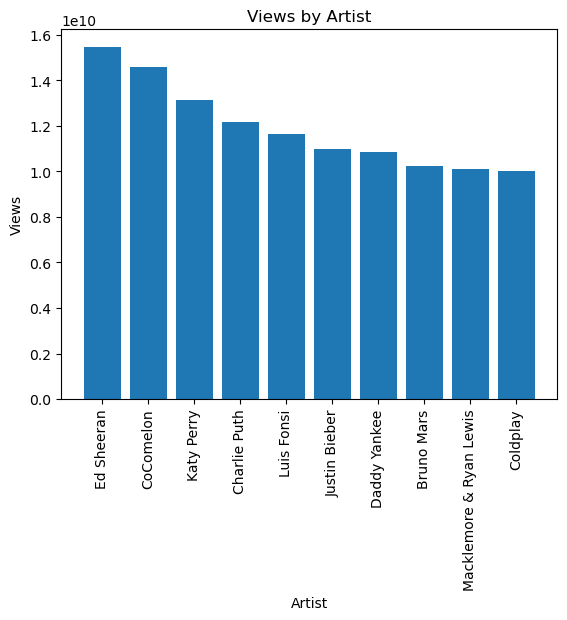

Showing Top 10 Spots by Views


,Artist,Views
0,Ed Sheeran,"15,460,207,769"
1,CoComelon,"14,601,671,211"
2,Katy Perry,"13,120,632,075"
3,Charlie Puth,"12,167,594,191"
4,Luis Fonsi,"11,628,113,031"
5,Justin Bieber,"10,991,060,236"
6,Daddy Yankee,"10,871,926,842"
7,Bruno Mars,"10,240,919,227"
8,Macklemore & Ryan Lewis,"10,122,055,560"
9,Coldplay,"9,997,277,884"


In [231]:
sum_data('Artist','Views',10)

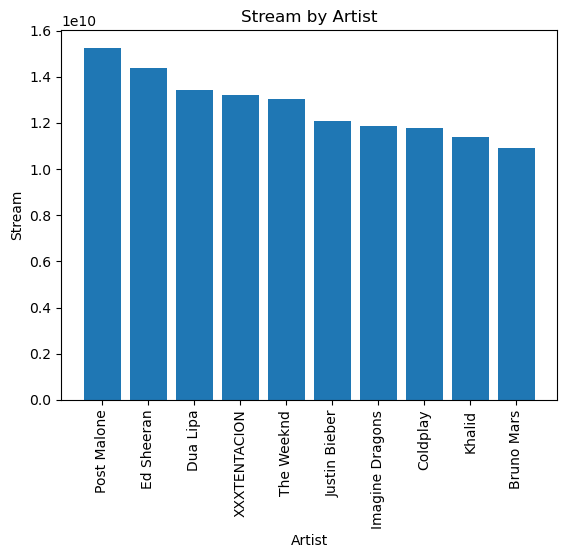

Showing Top 10 Spots by Stream


,Artist,Stream
0,Post Malone,"15,251,263,853"
1,Ed Sheeran,"14,394,881,557"
2,Dua Lipa,"13,408,076,274"
3,XXXTENTACION,"13,224,351,699"
4,The Weeknd,"13,031,973,376"
5,Justin Bieber,"12,097,767,422"
6,Imagine Dragons,"11,858,310,928"
7,Coldplay,"11,778,478,236"
8,Khalid,"11,386,839,915"
9,Bruno Mars,"10,897,862,950"


In [232]:
sum_data('Artist','Stream',10)

## Group by Album Type
---

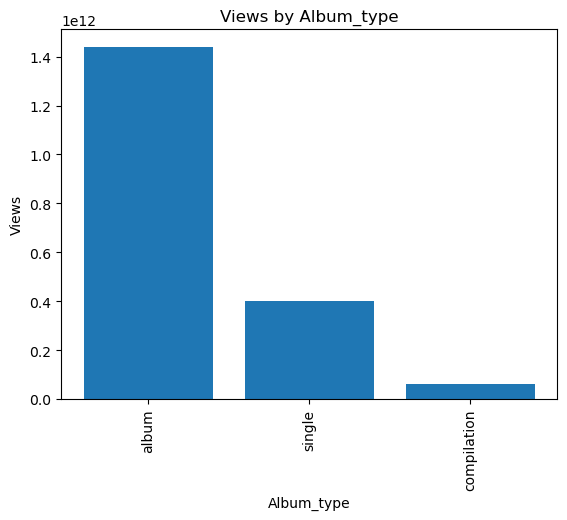

Showing Top 3 Spots by Views


,Album_type,Views
0,album,"1,438,910,059,139"
1,single,"401,916,456,409"
2,compilation,"61,226,486,759"


In [239]:
sum_data('Album_type','Views',3)

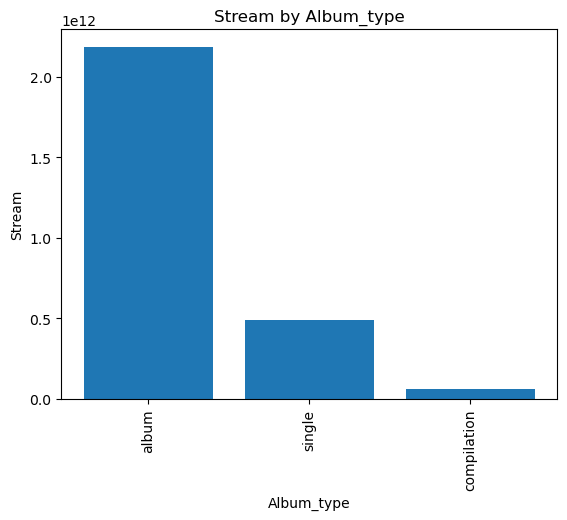

Showing Top 3 Spots by Stream


,Album_type,Stream
0,album,"2,183,382,627,508"
1,single,"493,103,212,262"
2,compilation,"61,661,758,924"


In [234]:
sum_data('Album_type','Stream',3)

## Group by Licensed
---

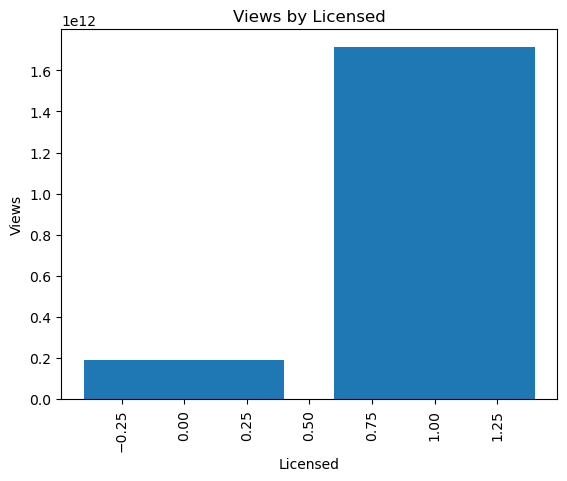

Showing Top 5 Spots by Views


,Licensed,Views
0,True,"1,713,218,436,430"
1,False,"188,834,565,877"


In [240]:
sum_data('Licensed','Views',5)

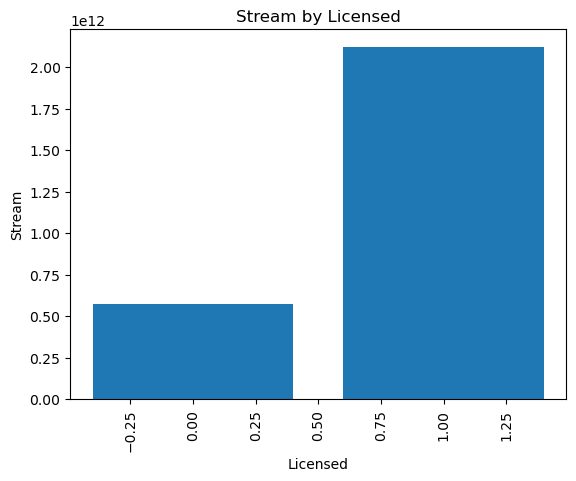

Showing Top 5 Spots by Stream


,Licensed,Stream
0,True,"2,120,642,657,923"
1,False,"575,760,230,600"


In [241]:
sum_data('Licensed','Stream',5)

## Grouped by Official Video 
---

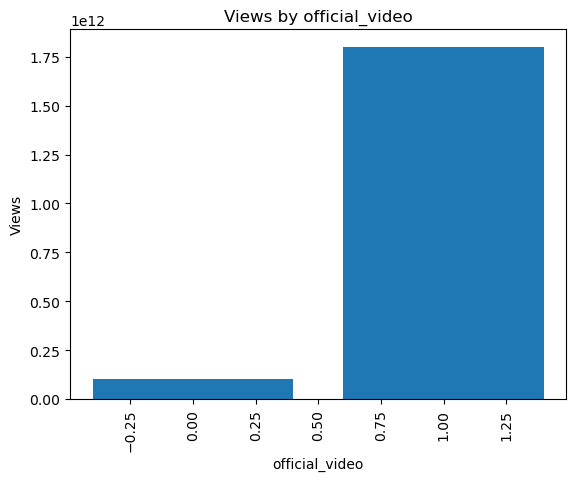

Showing Top 5 Spots by Views


,official_video,Views
0,True,"1,800,201,071,589"
1,False,"101,851,930,718"


In [242]:
sum_data('official_video','Views',5)

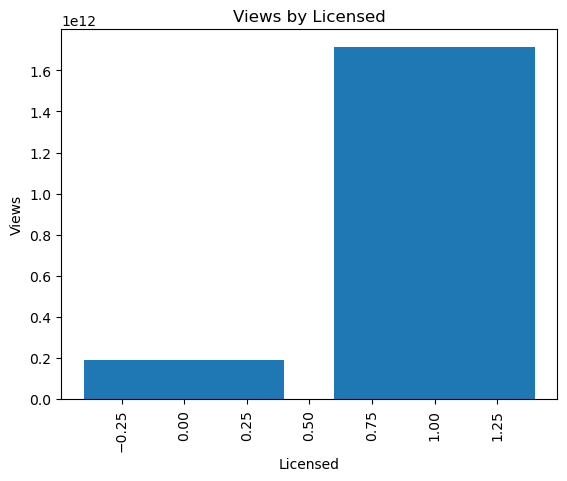

Showing Top 5 Spots by Views


,Licensed,Views
0,True,"1,713,218,436,430"
1,False,"188,834,565,877"


In [243]:
sum_data('Licensed','Views',5)